# Problem Set 7

#### Submitted by <b>Blessie Faith S. Bongalos | BSCS 2-A</b>


### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from scipy.stats import multivariate_normal, norm
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.colors as mcolors
import colorsys
import sys


### 1. Load the Iris dataset

In [2]:
df = pd.read_csv('iris.data', header=None)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Data wrangling & cleaning

In [3]:
X = df.iloc[:, 0:4].values

### 3. Estimate Gaussian parameters (μ, Σ)

In [4]:
mu = X.mean(axis=0)
sigma = np.cov(X.T)

### 4. Compute the multivariate Gaussian PDF for each sample

In [5]:
p = multivariate_normal(mean=mu, cov=sigma).pdf(X)

### 5. Plot the distribution of PDF values

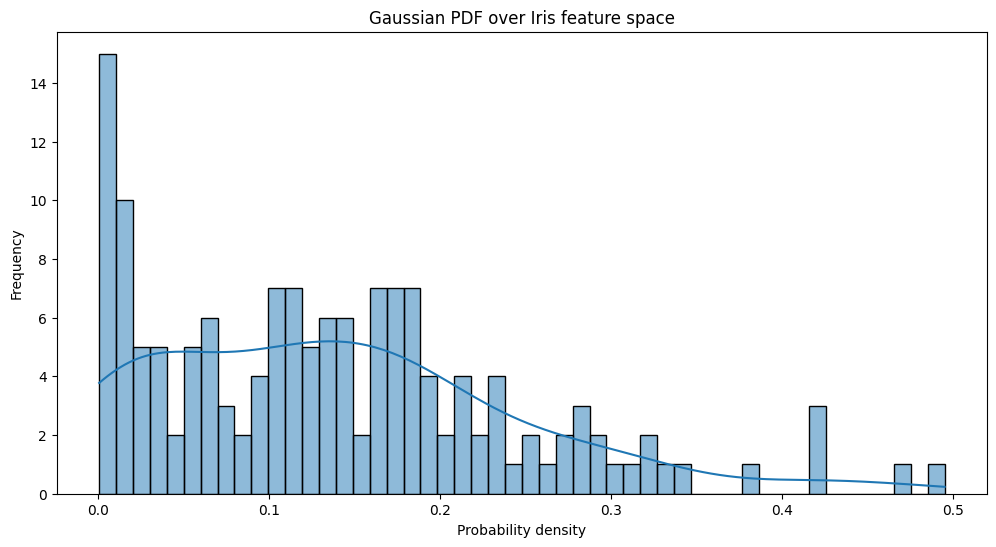

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(p, bins=50, kde=True)
plt.title('Gaussian PDF over Iris feature space')
plt.xlabel('Probability density')
plt.ylabel('Frequency')
plt.show()

### 6. Select a threshold ε and flag anomalies

In [7]:
epsilon = 1e-3
anomalies = np.where(p < epsilon)[0]
print(f'Number of anomalies detected: {len(anomalies)}')

Number of anomalies detected: 3


### 7. Visualize anomalies on the first two features

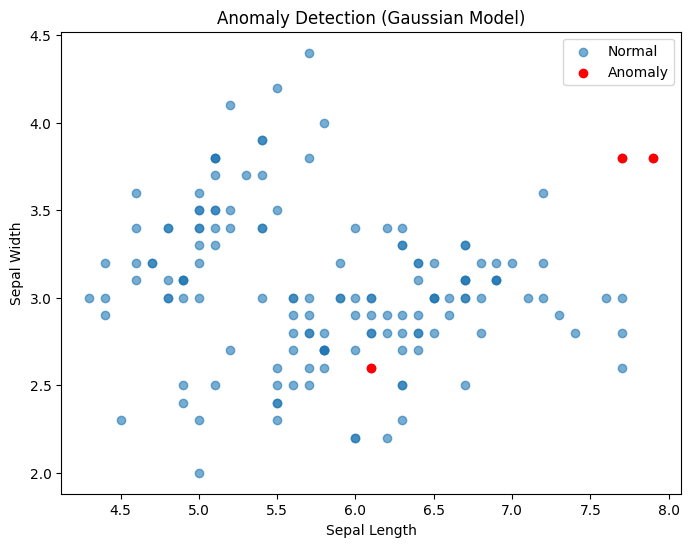

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Normal', alpha=0.6)
plt.scatter(X[anomalies, 0], X[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Anomaly Detection (Gaussian Model)')
plt.legend()
plt.show()

### 8. Create a custom HSV→RGB colormap for clusters

In [9]:
k = 3
HSV_tuples = [(i / k, 0.5, 0.5) for i in range(k)]
RGB_tuples = [colorsys.hsv_to_rgb(*hsv) for hsv in HSV_tuples]
cluster_colors = [mcolors.rgb2hex(rgb) for rgb in RGB_tuples]

### 9. Perform K-means clustering

In [10]:
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, labels)
centroids = kmeans.cluster_centers_

print(f'Silhouette Score for k={k}: {sil_score:.2f}')

Silhouette Score for k=3: 0.55


### 10. Visualize clusters

In [11]:
fig = go.Figure()
for i in range(k):
    fig.add_trace(go.Scatter(
        x=X[labels == i, 0],
        y=X[labels == i, 1],
        mode='markers',
        marker=dict(color=cluster_colors[i]),
        name=f'Cluster {i}'
    ))
# plot centroids
fig.add_trace(go.Scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    mode='markers',
    marker=dict(symbol='x', color='black', size=12),
    name='Centroids'
))
fig.update_layout(
    title=f'K-Means Clustering on Iris (k={k})<br>Silhouette Score: {sil_score:.2f}',
    xaxis_title='Sepal Length',
    yaxis_title='Sepal Width'
)
iplot(fig)